In [143]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Define Variabales and Parameters

In [202]:
# Define Variables

# States: Position and velocity
X = cp.Variable((dim_state,horizon+1))
X0 = cp.Parameter(dim_state)
X0.value = np.array([-1,0,0.5,0])  # Use .value to access or set values of parameters and variables

# Control Inputs: Acceleration
U = cp.Variable((dim_input,horizon))

goal = np.array([3.0,2.0,0.0,0.0])

### System Dynamics

In [190]:
# Time Step
dt = 0.1

# Double Integrator model
A = np.array([[0,0,dt,0],
              [0,0,0,dt],
              [0,0,0,0],
              [0,0,0,0]])

B = np.array([[0,0],
              [0,0],
              [dt,0],
              [0,dt]])

horizon = 50
dim_state = 4
dim_input = 2

### Solve MPC!

In [191]:
const = []
cost = 0

for i in range(horizon):
    if i==0:
        const += [X[:,i] == X0]

    # Dynamics
    const += [ X[:,i+1] == X[:,i] + A @ X[:,i] + B @ U[:,i] ]
    const += [ cp.abs(U[0,i]) <= 1.0 ]
    const += [ cp.abs(U[1,i]) <= 1.0 ]
    
    # Objective
    cost += cp.sum_squares(U[:,i])
       
const += [X[:,horizon] == goal]
    
objective = cp.Minimize( cost )

problem = cp.Problem( objective, const )

problem.solve()
print(f"The solver status is: {problem.status}")
    

The solver status is: optimal


### Plot Results

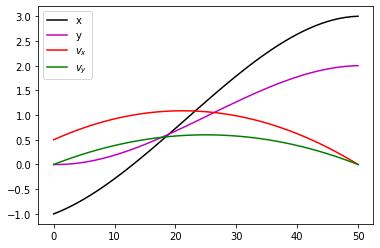

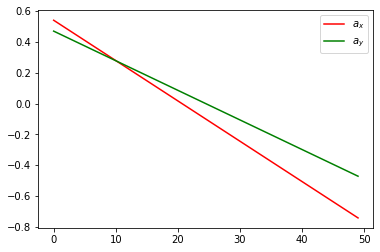

In [200]:
## Plot
fig1, ax1 = plt.subplots() 
plt.plot(X.value[0,:],'k',label='x')
plt.plot(X.value[1,:],'m',label='y')
plt.plot(X.value[2,:],'r',label='$v_x$')
plt.plot(X.value[3,:],'g',label='$v_y$')
plt.legend()

fig2, ax2 = plt.subplots() 
plt.plot(U.value[0,:],'r',label='$a_x$')
plt.plot(U.value[1,:],'g',label='$a_y$')
plt.legend()

### Define Variables and Parameters

In [207]:
x = cp.Variable(1)
a = cp.Parameter(1)

### Formulate the problem

In [212]:
objective = cp.Minimize(cp.square(x))
const = [x >= cp.square(a)]

problem = cp.Problem(objective,const)
a.value = np.array([0.1])

### Solve and take gradients!

In [213]:
problem.solve(requires_grad=True)
problem.backward()

print(f"The solution is x={x.value}")
print(f"The gradient with respect to a is :{a.gradient}")

The solution is x=[0.01]
The gradient with respect to a is :[0.2]


In [215]:
x = np.linspace(-5,5,10)

In [217]:
plt.plot(np)

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [229]:
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1,
               x - y <= 1.0]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("optimal (x - y <= 8) dual variable", constraints[2].dual_value)
print("x - y value:", (x - y).value)

optimal (x + y == 1) dual variable 1.3471759206778897e-09
optimal (x - y >= 1) dual variable 2.0035262734627173
optimal (x - y <= 8) dual variable 0.003526273372647608
x - y value: 0.9999999750232419


In [224]:
x.value

array(1.)

In [225]:
y.value

array(1.57008621e-22)